# Kaggle Titanic Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['Survived'] = np.NaN
all_data = pd.concat([train_data, test_data])

print(train_data.columns)
print(test_data.columns)
print(all_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test', 'Survived'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


# Data Exploration

In [4]:
#Separating categorical values from Numerical values
train_num = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train_data[['Survived', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
print(train_num.columns)
print(train_cat.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Survived', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [5]:
#Looking at the Correlation between numerical values
corr = train_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


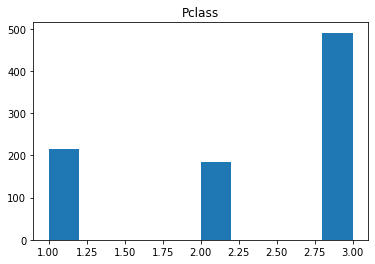

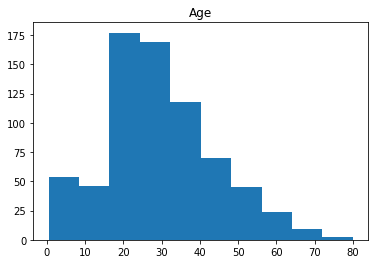

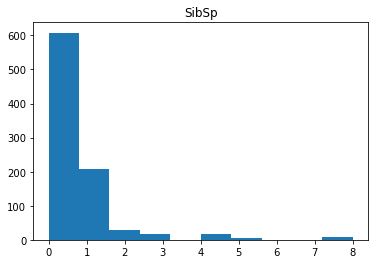

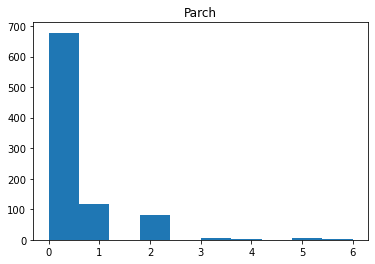

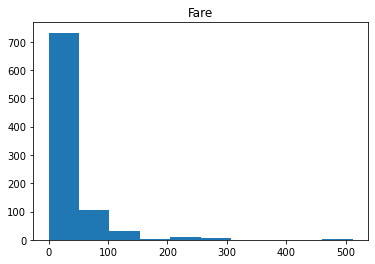

In [6]:
#Histograms to see the distribution of the numerical data
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


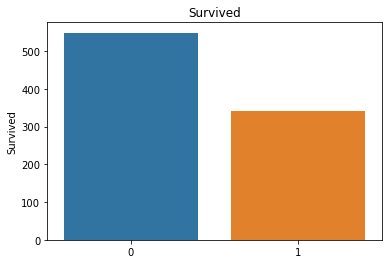

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


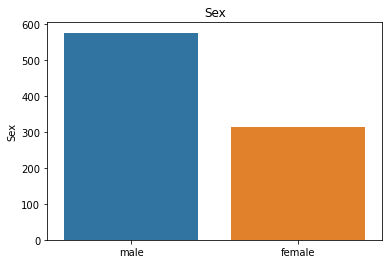

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


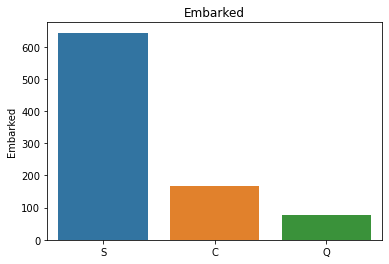

In [7]:
#Histograms to see the distribution of the categorical data
train_cat_temp = train_data[['Survived', 'Sex', 'Embarked']]

for i in train_cat_temp.columns:
    sns.barplot(train_cat_temp[i].value_counts().index, train_cat_temp[i].value_counts()).set_title(i)
    plt.show()

In [8]:
#Pivot tables to get some knowledge about who survived
print(pd.pivot_table(train_data,index='Survived',columns='Sex', values = 'Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train_data, index='Survived', columns='Pclass', values= 'Ticket',aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index='Survived', columns='Parch', values= 'Ticket',aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index='Survived', columns='SibSp', values= 'Ticket',aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index='Survived', columns='Embarked', values= 'Ticket',aggfunc ='count'))

Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         233.0  65.0  40.0  3.0  NaN  1.0  NaN

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering 

In [9]:
#Getting passenger's cabin class 
train_data['Cabin_class'] = train_data['Cabin'].apply(lambda x: str(x)[0])

pd.pivot_table(train_data, index='Survived', columns='Cabin_class', values='Ticket', aggfunc='count')

Cabin_class,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [10]:
#Creating a column to identify if the passenger's ticket is purely numerical
#Creating a column to identify the letters/word in the passenger's ticket.
train_data['Num_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['Letters_ticket'] = train_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [11]:
#Getting passenger's Titles
train_data['Title'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

print(train_data['Title'].value_counts())
pd.pivot_table(train_data, index='Survived', columns='Title', values='Ticket', aggfunc='count')

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


# Data Pre-Processing

In [12]:
#Drop Null Values from Embarked

train_data.dropna(subset=['Embarked'],inplace=True)
train_data['Embarked'].isna().sum()

0

C:\Users\chris\AppData\Local\Temp/ipykernel_25632/101832980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.Age[np.isnan(train_data.Age)] = np.nanmean(train_data.Age, axis=0)


<AxesSubplot:>

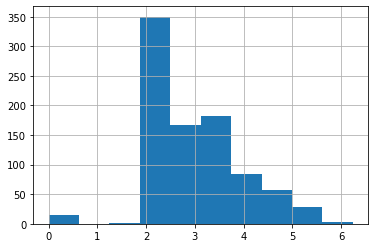

In [13]:
#Imput data with Mean age
train_data.Age[np.isnan(train_data.Age)] = np.nanmean(train_data.Age, axis=0)
np.count_nonzero(np.isnan(train_data.Age))
##train_data.Age = train_data.Age.fillna(train_data.Age.median())

#Normalize fare using logarithm
train_data['Norm_fare'] = np.log(train_data['Fare']+1)
train_data['Norm_fare'].hist()

In [14]:
train_data.Pclass = train_data.Pclass.astype('string')

#Selecting the relevant Data
#Create Dummy variables
my_dummies = pd.get_dummies(train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Norm_fare', 'Embarked','Cabin_class', 'Num_ticket', 'Title']])
print(my_dummies.columns)

#Scale data 0 - 1 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_scaled = my_dummies.copy()
train_data_scaled[['Age', 'SibSp', 'Parch', 'Norm_fare']] = scaler.fit_transform(train_data_scaled[['Age', 'SibSp', 'Parch', 'Norm_fare']])
train_data_scaled
 

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Norm_fare', 'Num_ticket',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_class_A', 'Cabin_class_B', 'Cabin_class_C', 'Cabin_class_D',
       'Cabin_class_E', 'Cabin_class_F', 'Cabin_class_G', 'Cabin_class_T',
       'Cabin_class_n', 'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess'],
      dtype='object')


,Pclass,Age,SibSp,Parch,Norm_fare,Num_ticket,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,3,-5.896199e-01,0.431350,-0.474326,-0.877591,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,6.448480e-01,0.431350,-0.474326,1.366380,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,-2.810029e-01,-0.475199,-0.474326,-0.796281,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,4.133853e-01,0.431350,-0.474326,1.066796,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,4.133853e-01,-0.475199,-0.474326,-0.781901,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,-2.038487e-01,-0.475199,-0.474326,-0.330815,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,1,-8.210826e-01,-0.475199,-0.474326,0.491068,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,3,-5.482138e-16,0.431350,2.006119,0.245663,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
889,1,-2.810029e-01,-0.475199,-0.474326,0.491068,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
#Applying the changes we made to the whole data-set:

#Creating a Cabin Classe
all_data['Cabin_class'] = all_data['Cabin'].apply(lambda x: str(x)[0])

#Collecting Ticket with numbers and letters
all_data['Num_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['Letters_ticket'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

#Getting the passengers' titles
all_data['Title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#Dropping Null values from Embarked
all_data.dropna(subset=['Embarked'], inplace=True)

#Impute data with Mean for age
all_data.Age[np.isnan(all_data.Age)] = np.nanmean(all_data.Age, axis=0)

#Normalize fare using logarithm
all_data['Norm_fare'] = np.log(all_data.Fare+1)

#Get Dummies
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Norm_fare', 'Embarked','Cabin_class', 'Num_ticket', 'Title', 'train_test']])

#Scale values
all_data_scaled = all_dummies.copy()
all_data_scaled[['Age', 'SibSp', 'Parch', 'Norm_fare']] = scaler.fit_transform(all_data_scaled[['Age', 'SibSp', 'Parch', 'Norm_fare']])
all_data_scaled


print(all_data.columns)
print(all_data.head())
print(all_data_scaled.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'Cabin_class', 'Num_ticket', 'Letters_ticket', 'Title', 'Norm_fare'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  train_test Cabin_class  \

C:\Users\chris\AppData\Local\Temp/ipykernel_25632/2173848910.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.Age[np.isnan(all_data.Age)] = np.nanmean(all_data.Age, axis=0)


In [16]:
#Spliting the data
X_train = all_data_scaled[all_data_scaled.train_test == 1].drop(['train_test'], axis=1)
X_test = all_data_scaled[all_data_scaled.train_test == 0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test==1].Survived

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(889, 38)
(418, 38)
(889,)


# Model Building 

In [17]:
#Importing Modules
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [18]:
#I had to remove the Norm_fare features as it was resulting in an infinity or NaN error
X_test_temp = X_test.drop(['Norm_fare'], axis = 1)
X_train_temp = X_train.drop(['Norm_fare'], axis = 1)

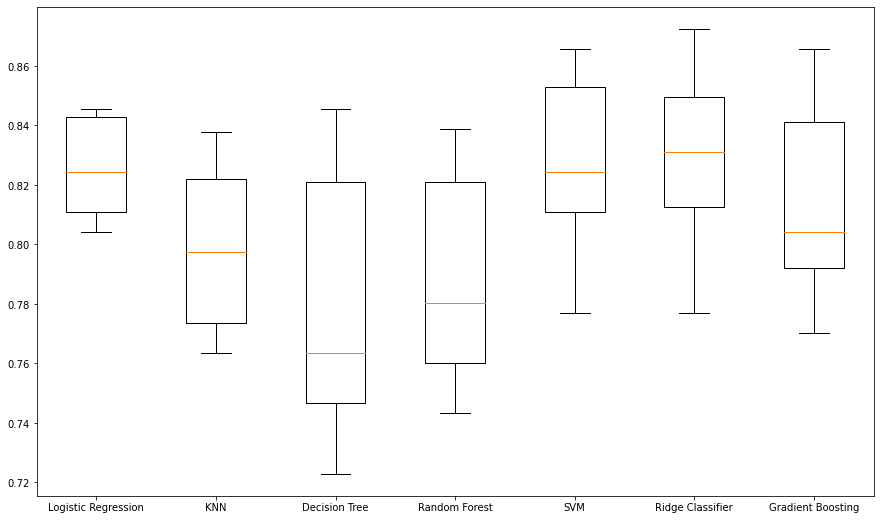

In [26]:
#Testing multiple models
models={'Logistic Regression': LogisticRegression(), 
        'KNN': KNeighborsClassifier(), 
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'Ridge Classifier': RidgeClassifier(),
        'Gradient Boosting': GradientBoostingClassifier()}
results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=10, shuffle=True)
    cv_results = cross_val_score(model, X_train_temp, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results,labels=models.keys())
plt.rcParams["figure.figsize"] = (14,9)
plt.show()

| Model | Tuned Results | Results w/o Norm_fare|
|:------|:--------------|:----------------|
|Logistic Regression |82.4%|82.7%|
|KNN                 |83.2%|83%|
|Decision Tree       |N/A  |N/A|
|Random Forest       |81.5%|79.3%|
|SVM                 |83.2%|83.3%|
|Ridge Classfier     |82.5%|83.1%|
|Gradient Boosting   |84.1%|82.7%|

Gradient Boosting takes a significanlty longer time to run than the rest of the tuned models.

In [20]:
#Tuning the logistic regression algorithm
#Finding the best parameters

#Params
logreg = LogisticRegression()
solvers = ['newton-cg','lbfgs','liblinear']
penalty = ['l2']
c_values = [100,10,1.0,0.1,0.01]

#GridSearch
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv,
                          scoring='accuracy', error_score=0)
grid_results = grid_search.fit(X_train_temp, y_train)

#Summarizing results
print('Best %f using %s' % (grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print('%f (%f) with: %r' % (mean,stdev,param))


Best 0.827145 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.823770 (0.035005) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823770 (0.035005) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823770 (0.035005) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.824523 (0.033538) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823774 (0.035215) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824898 (0.032918) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.827137 (0.031385) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.826387 (0.031138) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827145 (0.032126) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.822276 (0.036406) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.822276 (0.036406) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.822285 (0.038537) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.809917 (0.037172) with

In [21]:
#Tuning the KNeighbors algorithm
#Finding the best parameters

#Params
knn = KNeighborsClassifier()
n_neighbors = range(1,21,2)
weights = ['uniform','distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#Define grid search
grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv,
                          scoring='accuracy', error_score=0)
grid_results = grid_search.fit(X_train_temp, y_train)

#Summarize results
print('Best: %f using %s' % (grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.830154 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.746506 (0.038308) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.746506 (0.038308) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.793046 (0.036805) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.788143 (0.039098) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.804277 (0.041218) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.791139 (0.042181) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.814781 (0.039840) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.796021 (0.040405) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.820782 (0.037345) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.803141 (0.037952) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.825668 

In [22]:
#Tuning the Random Forest algorithm
#Finding the best parameters

#Params
rfc = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rfc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_temp, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793765 using {'max_features': 'log2', 'n_estimators': 100}
0.790769 (0.041557) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.789641 (0.035373) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.789662 (0.034279) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.789620 (0.037484) with: {'max_features': 'log2', 'n_estimators': 10}
0.793765 (0.032966) with: {'max_features': 'log2', 'n_estimators': 100}
0.787389 (0.036125) with: {'max_features': 'log2', 'n_estimators': 1000}


In [23]:
#Tuning the Support Vector Classification algorithm
#Finding the best parameters

#Params
svc = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_temp, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832784 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.809525 (0.035399) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.814760 (0.036991) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.683184 (0.048967) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.813296 (0.037170) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.820791 (0.035482) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.682457 (0.046953) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.830167 (0.040170) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.832784 (0.040155) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.695940 (0.045669) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.796025 (0.046939) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.823029 (0.039880) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.776558 (0.045374) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.617543 (0.001302) with: {'C': 0.01, 'gamma': 'scale',

In [24]:
#Tuning the Ridge Classifier algorithm
#Finding the best parameters

#Params
ridge = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridge, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_temp, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830537 using {'alpha': 0.8}
0.830163 (0.037699) with: {'alpha': 0.1}
0.830163 (0.037699) with: {'alpha': 0.2}
0.830163 (0.037699) with: {'alpha': 0.3}
0.830163 (0.037699) with: {'alpha': 0.4}
0.830163 (0.037699) with: {'alpha': 0.5}
0.830163 (0.037699) with: {'alpha': 0.6}
0.830163 (0.037699) with: {'alpha': 0.7}
0.830537 (0.038098) with: {'alpha': 0.8}
0.830537 (0.038098) with: {'alpha': 0.9}
0.830163 (0.037810) with: {'alpha': 1.0}


In [25]:
#Tuning the Random Forest algorithm
#Finding the best parameters

#Params
boost = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=boost, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_temp, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

| Model Predictions| Survivors | Dead |
|:-----------------|:----------|:-----|
|Logistic Regression |168|250|
|KNN                 |147|271|
|Random Forest       |153|265|
|SVM                 |160|258|
|Ridge Classfier     |168|250|
|Gradient Boosting   |155|263|

In [27]:
#Using the best parameters for each model we make perdiction on the test set.

#Logistic Regression
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
logreg.fit(X_train_temp,y_train)

y_pred_logreg = logreg.predict(X_test_temp)
sl = np.count_nonzero(y_pred_logreg == 1.0)
dl = np.count_nonzero(y_pred_logreg == 0.0)



#KNeighbors
knn = KNeighborsClassifier(n_neighbors=19, weights='uniform', metric='manhattan')
knn.fit(X_train_temp, y_train)

y_pred_knn = knn.predict(X_test_temp)
sk = np.count_nonzero(y_pred_knn == 1.0)
dk = np.count_nonzero(y_pred_knn == 0.0)



#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt')
rfc.fit(X_train_temp, y_train)

y_pred_rfc = rfc.predict(X_test_temp)
sf = np.count_nonzero(y_pred_rfc == 1.0)
df = np.count_nonzero(y_pred_rfc == 0.0)



#Support Vector Classification
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train_temp, y_train)

y_pred_svc = svc.predict(X_test_temp)
ss = np.count_nonzero(y_pred_svc == 1.0)
ds = np.count_nonzero(y_pred_svc == 0.0)



#Ridge Classifier
ridge = RidgeClassifier(alpha=0.8)
ridge.fit(X_train_temp, y_train)

y_pred_r = ridge.predict(X_test_temp)
sr = np.count_nonzero(y_pred_r == 1.0)
dr = np.count_nonzero(y_pred_r == 0.0)



#Gradient Boosting Classifier
boost = GradientBoostingClassifier(learning_rate = 0.1, n_estimators=100, subsample=0.7, max_depth=3)
boost.fit(X_train_temp, y_train)

y_pred_gb = boost.predict(X_test_temp)
sg = np.count_nonzero(y_pred_gb == 1.0)
dg = np.count_nonzero(y_pred_gb == 0.0)


#Creating a Pandas DataFrame so it updates automatically in case of changes
pre_data = {'Survivors': [sl,sk,sf,ss,sr,sg], 'Dead':[dl,dk,df,ds,dr,dg]}
pd.DataFrame(data=pre_data, index=('Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Ridge Classifer', 'Gradient Boosting'))


,Survivors,Dead
Logistic Regression,168,250
KNN,147,271
Random Forest,160,258
SVM,160,258
Ridge Classifer,168,250
Gradient Boosting,158,260


In [ ]:
#Submission File
submission_data_logreg = {'PassengerId': test_data.PassengerId, 'Survived': y_pred_logreg}
sub_logreg = pd.DataFrame(submission_data_logreg)

submission_data_knn = {'PassengerId': test_data.PassengerId, 'Survived': y_pred_knn}
sub_knn = pd.DataFrame(submission_data_knn)

submission_data_rfc = {'PassengerId': test_data.PassengerId, 'Survived': y_pred_rfc}
sub_rfc = pd.DataFrame(submission_data_rfc)

submission_data_svc = {'PassengerId': test_data.PassengerId, 'Survived': y_pred_svc}
sub_svc = pd.DataFrame(submission_data_svc)

submission_data_ridge = {'PassengerId': test_data.PassengerId, 'Survived': y_pred_r}
sub_ridge = pd.DataFrame(submission_data_ridge)

submission_data_boost = {'PassengerId': test_data.PassengerId, 'Survived': y_pred_gb}
sub_boost = pd.DataFrame(submission_data_boost)


sub_logreg.to_csv('submission_logreg.csv', index=False)
sub_knn.to_csv('submission_knn.csv', index=False)
sub_rfc.to_csv('submission_rfc.csv', index=False)
sub_svc.to_csv('submission_svc.csv', index=False)
sub_ridge.to_csv('submission_ridge.csv', index=False)
sub_boost.to_csv('submission_boost.csv', index=False)
